# Market Research Related to Restaurants in LA
# Contents <a id='back'></a>

1. Introduction
    
    
2. Data Pra-processing
    * Loading Data
    * Preliminary Exploratory Data
    * Checking Data Quality
    * Checking Missing Values
    * Checking Data Duplicate
    * Initial Conclusion
   

3. Data Analysis


4. Overall Conclusion

## Introduction <a id='intro'></a>

We have decided to open a small cafe in Los Angeles. Our cafe can be said to be quite unique, because we "employ" robots as waiters or waitresses. This project is promising, but requires large capital.

Therefore, together with our partners, we decided to attract investors. They are interested in the current state of the market—but can we sustain our success when the appeal of robots starts to wane?

Considering that we are an analytical expert, partners also ask us to prepare some market research. We have open source data about restaurants in LA.

## Data Pra-processing <a id='intro'></a>
### Loading Data

In [1]:
# Load the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data files into DataFrame
# Optimize the data for analysis purposes, type column object converted into category
# Columns containing dates are converted to date data types

df = pd.read_csv('rest_data_us.csv')

Data descriptions:
    
* *`object_name`* — the name of business
* *`chain`* — chain based attempt (TRUE/FALSE)
* *`object_type`* — the type of business
* *`address`* — adress
* *`number`* — the number of seats

**Conclusions:**

Each row in the table holds restaurant data. the columns describe the restaurant itself, object_name, chain/non-chain based, business type, address, and number of seats.

It is clear that the data we have is sufficient for us to conduct data analysis related to market research for restaurants in LA.

To continue the analysis, we need to do data pre-processing first.

### Preliminary Exploratory Data

In [3]:
# Show the shape of the data

df.shape

(9651, 6)

In [4]:
# Show the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
# Show the data head of the data

df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [6]:
# Show the data distribution of first DataFrame

df.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


### Checking Data Quality

In [7]:
# Checking data quality per each column

df['id'].sort_values()

0       11786
1       11787
2       11788
3       11789
4       11790
        ...  
9646    21432
9647    21433
9648    21434
9649    21435
9650    21436
Name: id, Length: 9651, dtype: int64

In [8]:
# Checking data quality per each column

df['object_name'].value_counts()

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
                              ..
BAMBOO INN                     1
EL CARMEN                      1
COLE'S                         1
H & H CATERING POOL BAR        1
CAFE SPROUTS                   1
Name: object_name, Length: 8672, dtype: int64

In [9]:
# Checking data quality per each column

df['address'].value_counts()

3607 TROUSDALE PKWY             11
135 N GRAND AVE                 10
400 WORLD WAY                    9
5151 STATE UNIVERSITY DR         9
600 WORLD WAY                    9
                                ..
175 S FAIRFAX AVE                1
3700 W OLYMPIC BLVD STE #101     1
12746 JEFFERSON BLVD             1
3600 WILSHIRE BLVD STE 100B      1
1300 S SAN PEDRO ST STE 111      1
Name: address, Length: 8517, dtype: int64

In [10]:
# Checking data quality per each column

df['chain'].unique()

array([False, True, nan], dtype=object)

In [11]:
# Checking data quality per each column

df['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [12]:
# Checking data quality per each column

df['number'].sort_values()

6042      1
8907      1
3926      1
899       1
3485      1
       ... 
4854    229
5091    229
3277    229
7383    229
8699    229
Name: number, Length: 9651, dtype: int64

### Conversion Data Type

In [13]:
# Conversion the data type of the chain columns from object to boolean

df['chain'] = df['chain'].astype(bool)

In [14]:
# Check our data again after changing the data type

df.dtypes

id              int64
object_name    object
address        object
chain            bool
object_type    object
number          int64
dtype: object

### Checking Missing Values

In [15]:
# Check missing values

df.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [16]:
# Check the percentage of missing values

df.isna().sum() / len(df) * 100

id             0.0
object_name    0.0
address        0.0
chain          0.0
object_type    0.0
number         0.0
dtype: float64

In [17]:
# Save the original data to another new table

df_ori = df

In [18]:
# Remove missing values as they are only 3 rows into new tables

df = df.dropna().reset_index(drop=True)

In [19]:
# Check our data again whether there are no more missing values

df.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

### Checking Data Duplicate


In [20]:
# Checks for duplicate data

df.duplicated().sum()

0

### Initial Conclusion

* Our datasets amounted **9651** rows and **6** columns.
* From the data exploration, we find that the data type is appropriate already.
* There are missing values of 3 rows or 0.03%. We remove them since the amount is not significant to the whole data, but before that we save the original data to another new table.
* The *`chain`* column is converted to a boolean from an object type.
* There are no duplicate data.

##  Data Analysis

### The proportions of the various types of businesses

In [21]:
# Look back table of df

df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [22]:
# Grouping data by object_type column

grouped_type = df.groupby(df['object_type']).count().sort_values(by='number', ascending=False).reset_index()
grouped_type

,object_type,id,object_name,address,chain,number
0,Restaurant,7255,7255,7255,7255,7255
1,Fast Food,1066,1066,1066,1066,1066
2,Cafe,435,435,435,435,435
3,Pizza,320,320,320,320,320
4,Bar,292,292,292,292,292
5,Bakery,283,283,283,283,283


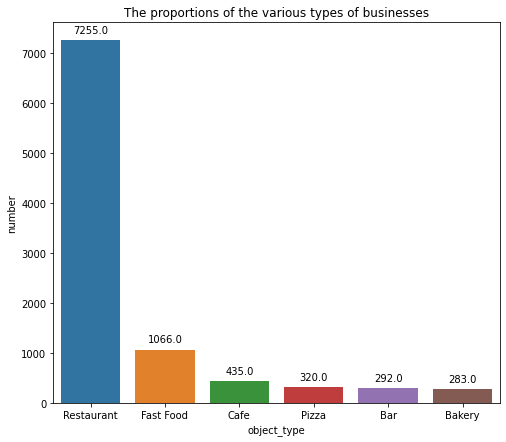

In [23]:
# Visualization

plt.figure(figsize=(8,7))
splot = sns.barplot(data=grouped_type, x='object_type', y='number')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0,10),
                   textcoords = 'offset points')
plt.xticks
plt.title('The proportions of the various types of businesses')
plt.show();

In [24]:
# Calculate the proportions of the various types of businesses

grouped_type['% business type'] = grouped_type['number'] / grouped_type['number'].sum() * 100
grouped_type

,object_type,id,object_name,address,chain,number,% business type
0,Restaurant,7255,7255,7255,7255,7255,75.173557
1,Fast Food,1066,1066,1066,1066,1066,11.045488
2,Cafe,435,435,435,435,435,4.507305
3,Pizza,320,320,320,320,320,3.315719
4,Bar,292,292,292,292,292,3.025593
5,Bakery,283,283,283,283,283,2.932339


**Findings:**
- 75% of business in LA is dominated by restaurants.

**Insights:**
- We might say that the need for people in LA to eat in restaurants is probably very high, then  the number of restaurants there is high to meet the demand.
- Competition between restaurants type of business is also high.

**Recommendations:**
- Try to consider to opening a fast food business because the opportunity is still big and the competition is only around 11% among other fast food companies.

### The proportion of chain-based and non-chain based businesses

In [25]:
# Grouping data by chain column

grouped_chain = df.groupby(df['chain']).count().reset_index()
grouped_chain

,chain,id,object_name,address,object_type,number
0,False,5972,5972,5972,5972,5972
1,True,3679,3679,3679,3679,3679


In [26]:
# Visualization

fig = go.Figure(data=[go.Pie(labels=grouped_chain['chain'], values=grouped_chain['number'],
                             title='The proportions of the various types of businesses')])
fig.show();

**Findings:**
- 61.9% business in LA is non-chain based.

**Insights:**
- Businesses in LA are mostly private businesses and even if they might have branches, maybe not many, just 2 or 3 branches.

**Recommendations:**
- Opportunity in chain business is still high as only 38.1% are in LA, please consider spreading business using this method to increase revenue faster.


### Which type of business is usually a chain?

In [27]:
# Look back table of df

df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [28]:
# Grouping by business type and chain
# We fillna(1) for Bakery, so for later visualization, the bar will appear

group_chain_object = pd.pivot_table(df, values='object_name',
                                    index='object_type',
                                    columns=['chain'],
                                    aggfunc='count').fillna(1)
group_chain_object.reset_index()

chain,object_type,False,True
0,Bakery,1.0,283.0
1,Bar,215.0,77.0
2,Cafe,169.0,266.0
3,Fast Food,461.0,605.0
4,Pizza,166.0,154.0
5,Restaurant,4961.0,2294.0


In [29]:
# Calculate ratio of chain true vs. false

group_chain_object['chain_ratio'] = (group_chain_object[True] / \
                                    (group_chain_object[True] + group_chain_object[False])) * 100
group_chain_object.reset_index()
group_chain_object.sort_values(by='chain_ratio', ascending=False)

chain,False,True,chain_ratio
object_type,,,
Bakery,1.0,283.0,99.647887
Cafe,169.0,266.0,61.149425
Fast Food,461.0,605.0,56.754221
Pizza,166.0,154.0,48.125000
Restaurant,4961.0,2294.0,31.619573
Bar,215.0,77.0,26.369863


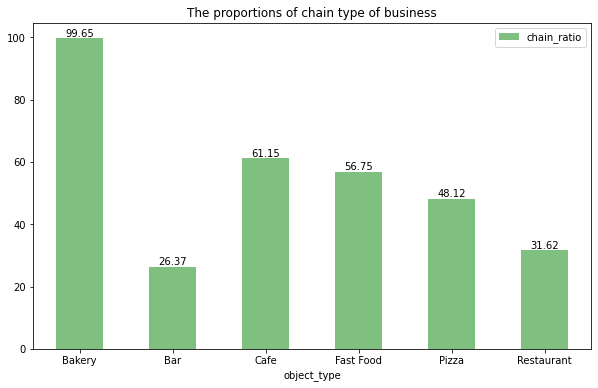

In [30]:
# Visualization

plt.figure(figsize=(8,7))
plots = group_chain_object['chain_ratio'].plot.bar(figsize=(10,6), legend=True, color='green', alpha=0.5)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title('The proportions of chain type of business')
plt.xticks(rotation = 0)
plt.show();

**Findings:**
- The type of bakery business is 100% chain business in LA.
- Cafes and fast food took the second and top three positions with 61.15% and 56.75% chain business in LA, respectively.

**Insights:**
- Businesses in LA are mostly private businesses and even if they might have branches, maybe not many, just 2 or 3 branches.

**Recommendations:**
- Opportunity in chain business is still high as only 38.1% are in LA, please consider spreading business using this method to increase revenue faster.


### The characteristics of a chain-based business
- Having many places with a small number of seats or having several places with a large number of seats?

In [31]:
# Grouping data by the chain column is true

df_chain = df[df['chain']==True]

In [32]:
# See the distribution of chain business per object_name

df_chain['object_name'].value_counts()

THE COFFEE BEAN & TEA LEAF               47
SUBWAY                                   31
DOMINO'S PIZZA                           15
KENTUCKY FRIED CHICKEN                   14
WABA GRILL                               14
                                         ..
YUM YUM DONUTS # 75-P                     1
STARBUCKS COFFEE #13286                   1
THE FRENCH CREPE COMPANY PREP KITCHEN     1
YUM YUM CHINESE FOOD                      1
CAFE SPROUTS                              1
Name: object_name, Length: 2736, dtype: int64

In [33]:
# Take an example to see a distribution with the higher of branches

df_chain[df_chain['object_name'] == 'THE COFFEE BEAN & TEA LEAF'].sort_values(by='number',
                                                                              ascending=False).reset_index()

,index,id,object_name,address,chain,object_type,number
0,1154,12940,THE COFFEE BEAN & TEA LEAF,5700 WILSHIRE BLVD STE 120,True,Cafe,74
1,7607,19393,THE COFFEE BEAN & TEA LEAF,3435 WILSHIRE BLVD STE 141,True,Cafe,49
2,9011,20797,THE COFFEE BEAN & TEA LEAF,11698 SAN VICENTE BLVD,True,Cafe,49
3,8002,19788,THE COFFEE BEAN & TEA LEAF,1001 GAYLEY AVE # B,True,Cafe,48
4,3177,14963,THE COFFEE BEAN & TEA LEAF,300 S LA CIENEGA BLVD,True,Cafe,48
5,5905,17691,THE COFFEE BEAN & TEA LEAF,1500 WESTWOOD BLVD,True,Cafe,48
6,6741,18527,THE COFFEE BEAN & TEA LEAF,10419 W VENICE BLVD,True,Cafe,44
7,2610,14396,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,True,Cafe,43
8,6619,18405,THE COFFEE BEAN & TEA LEAF,10401 SANTA MONICA BLVD,True,Cafe,43
9,5355,17141,THE COFFEE BEAN & TEA LEAF,801 W 7TH ST,True,Cafe,42


In [34]:
# Take an example to see a distribution with the higher of branches

df_chain[df_chain['object_name'] == 'SUBWAY'].sort_values(by='number', ascending=False).reset_index()

,index,id,object_name,address,chain,object_type,number
0,3998,15784,SUBWAY,635 S HOBART BLVD,True,Fast Food,43
1,566,12352,SUBWAY,3991 S WESTERN AVE STE #3,True,Fast Food,40
2,4436,16222,SUBWAY,5701 S CENTRAL AVE,True,Fast Food,29
3,4753,16539,SUBWAY,5864 S VERMONT AVE,True,Fast Food,28
4,5012,16798,SUBWAY,12730 S FIGUEROA ST STE 102,True,Fast Food,25
5,4509,16295,SUBWAY,7825 BEVERLY BLVD STE #4,True,Fast Food,25
6,8739,20525,SUBWAY,11762 SAN VICENTE BLVD,True,Fast Food,23
7,1057,12843,SUBWAY,610 S RAMPART BLVD,True,Fast Food,22
8,4282,16068,SUBWAY,198 S VERMONT AVE,True,Fast Food,21
9,6893,18679,SUBWAY,1400 W PICO BLVD,True,Fast Food,20


In [35]:
# Take an example to see a distribution with the less of branches

df_chain[df_chain['object_name'] == 'KFC'].sort_values(by='number', ascending=False).reset_index()

,index,id,object_name,address,chain,object_type,number
0,5826,17612,KFC,2801 W OLYMPIC BLVD,True,Fast Food,101
1,2402,14188,KFC,340 N WESTERN AVE,True,Fast Food,66
2,6262,18048,KFC,5130 RODEO RD,True,Fast Food,49
3,4307,16093,KFC,126 S VERMONT AVE # 112,True,Fast Food,37
4,7038,18824,KFC,4903 EAGLE ROCK BLVD,True,Fast Food,37
5,6909,18695,KFC,380 WORLD WAY T33,True,Fast Food,34
6,9054,20840,KFC,2807 S FIGUEROA ST,True,Fast Food,34
7,2649,14435,KFC,11864 WILMINGTON AVE,True,Fast Food,19
8,3781,15567,KFC,5720 S VERMONT AVE,True,Fast Food,6


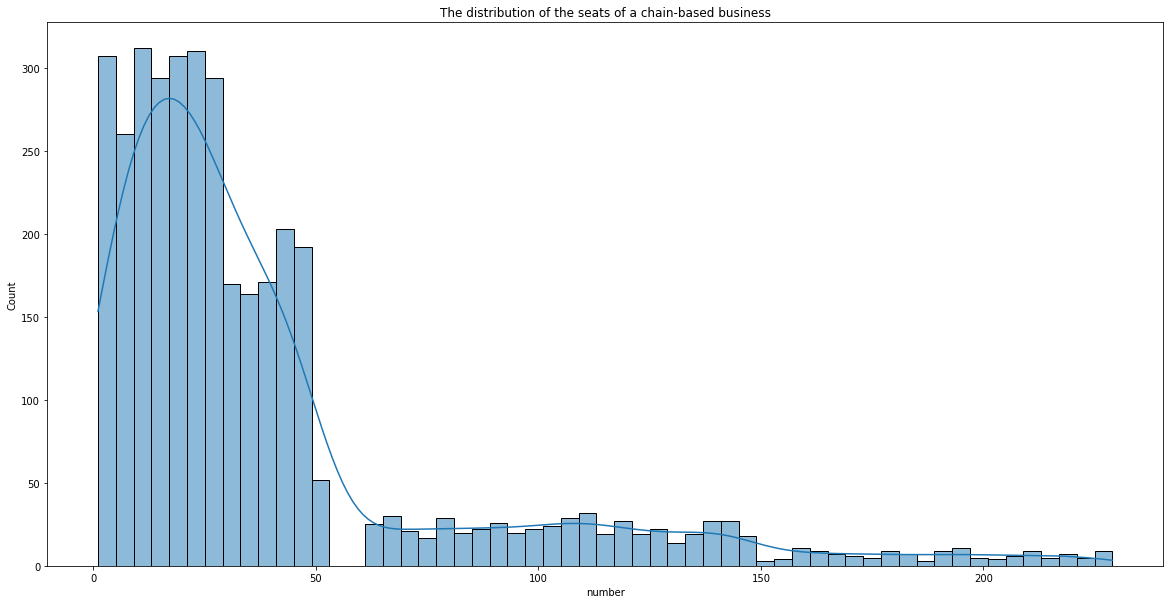

In [36]:
# Visualization of the distribution of the seats

plt.figure(figsize=(20,10))
sns.histplot(data=df_chain['number'], kde=True)
plt.title('The distribution of the seats of a chain-based business');

In [37]:
# See the distribution of the seats

df_chain['number'].describe()

count    3679.000000
mean       39.675455
std        43.426312
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

**Findings:**
- For chain business, the number of seats varies with most being dominated by 1-50 seats.
- For examples:
    - THE COFFEE BEAN & TEA LEAF is a cafe type of business, as the highest the number of branches with 47 branches, has the number of seats varies from 2 to 74 seats per branch.
    - SUBWAY is a fast food type of business, has 31 branches in LA, has the number of seats varies from 1 to 43 seats per branch.
    - KFC is a fast food type of business, has nine locations in LA, however the number of seats varies from 6 to 101 seats per branch.
    
**Insights:**
- There is no specific characteristics of a chain-based business, especially from the number of seats.

**Recommendations:**
- The number of seats is not a feature of a chain-based business, so we don't need to focus too much on the number.
- It can be assumed that the number of seats can be adjusted to the shape of the location of the business/restaurant.

### The average number of seats for each type of restaurant
- On average, which type of restaurant has the most number of seats?

In [38]:
# Calculate the average of number of seats per each type of restaurant

avg_chain_object = df.groupby('object_type').agg(mean=('number', 'mean')).sort_values(by='mean', ascending=False)
avg_chain_object

,mean
object_type,
Restaurant,48.042316
Bar,44.767123
Fast Food,31.837711
Pizza,28.459375
Cafe,25.000000
Bakery,21.773852


<Figure size 1080x720 with 0 Axes>

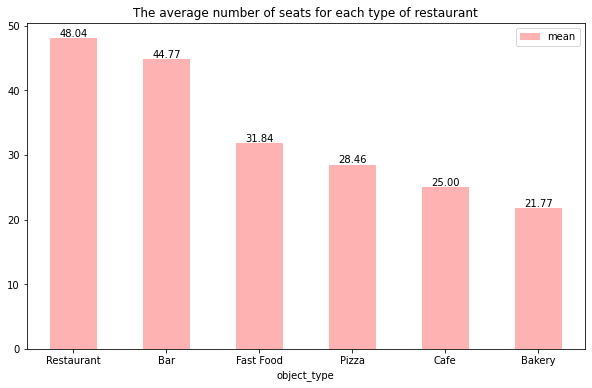

In [39]:
# Visualization

plt.figure(figsize=(15,10))
plots = avg_chain_object.plot.bar(figsize=(10,6), legend=True, color='red', alpha=0.3)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title('The average number of seats for each type of restaurant')
plt.xticks(rotation = 0)
plt.show();

**Findings:**
- On average per type of business, restaurants are business that has the most number of seats of 48 seats.
- Bakery is a type of business with small number of seats, on average of 21 seats.
    
**Insights:**
- Many people go to the restaurant to eat dine-in, while people who go to the bakery to take away, so restaurants need to have as many seats as possible, while bakeries don't.

**Recommendations:**
- We don't need a lot of seats when opening a bakery business, so we can reduce initial capital costs. The opportunity of the business is also high in LA (the proportion of existing businesses is still small at 2.9%).

### Move street name data from column address to separate column.

In [40]:
# Look back table of df

df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [41]:
# Move address column to the new table

df_address = df['address'].apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
df_address['count'] = 1
df_address

,address,count
0,N EAGLE ROCK BLVD,1
1,WORLD WAY # 120,1
2,HOLLYWOOD BLVD # 253,1
3,W SUNSET BLVD,1
4,ECHO PARK AVE,1
...,...,...
9646,W TEMPLE AVE,1
9647,MELROSE AVE,1
9648,HOLLYWOOD BLVD,1
9649,S SPRING ST STE 100,1


### Make a chart showing the top ten street names by number of restaurants.

In [42]:
# Take the top ten street from table of df_address

rest_top_address = df_address.groupby('address').count().sort_values(by='count', ascending=False)[0:10].reset_index()
rest_top_address

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,MELROSE AVE,128


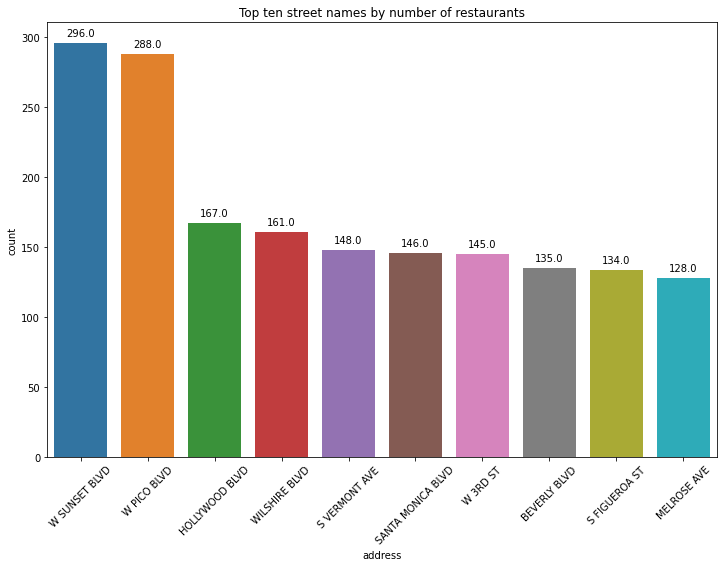

In [43]:
# Visualization

plt.figure(figsize=(12,8))
splot = sns.barplot(data=rest_top_address, x='address', y='count')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0,10),
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('Top ten street names by number of restaurants')
plt.show();

**Findings:**
- Based on the graph above, W SUNSET BLVD and W PICO BLVD are the streets with the most restaurants, there are 296 and 288 restaurants respectively.

**Insights:**
- W SUNSET BLVD and W PICO BLVD are the most popular places that have many restaurants, indicating a large number of customers who visit the places.

**Recommendations:**
- We can open a restaurant on the top ten address above because they are indicating a large number of customers who visit the places.


### Find the number of streets that have only one restaurant.

In [44]:
# Create a new table to save all restaurants based on address name 

df_address_agg = df_address.groupby('address').count().sort_values(by='count', ascending=False)
df_address_agg

,count
address,
W SUNSET BLVD,296
W PICO BLVD,288
HOLLYWOOD BLVD,167
WILSHIRE BLVD,161
S VERMONT AVE,148
...,...
S BROADWAY # #A35,1
S BROADWAY # 3,1
S BROADWAY # 4CC/1,1


In [45]:
# Calculate the number of streets that have only one restaurant

df_address_agg[df_address_agg['count'] == 1].shape[0]

2481

**Findings:**
- Based on the data above, there are 2481 of streets that have only one restaurant.

### For a street occupied by many restaurants, pay attention to the distribution of the number of seats.
- What trends can you observe?


In [46]:
# Look back table of rest_top_address

rest_top_address

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,MELROSE AVE,128


In [47]:
# Look back table of df

df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [48]:
# Filter table df based on column address of W SUNSET BLVD as the most restaurants with number of seats

top_seat_add = df[df['address'].str.contains('W SUNSET BLVD')].reset_index(drop=True)
top_seat_add

,id,object_name,address,chain,object_type,number
0,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
1,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
2,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
3,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118
4,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,True,Restaurant,35
...,...,...,...,...,...,...
363,21284,PA ORD EXPRESS,5301 W SUNSET BLVD # 11,False,Fast Food,31
364,21309,BUTTER'S ICE CREAM,2925 W SUNSET BLVD,False,Restaurant,29
365,21313,REGULA GUY'S PIZZA,5173 W SUNSET BLVD,False,Pizza,20
366,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1


In [49]:
# Distribution number of seats at W SUNSET BLVD

top_seat_add.describe()

,id,number
count,368.000000,368.000000
mean,16131.826087,48.763587
std,2716.192976,49.511522
min,11789.000000,1.000000
25%,14103.000000,16.000000
50%,15801.500000,34.000000
75%,18240.500000,49.000000
max,21368.000000,229.000000


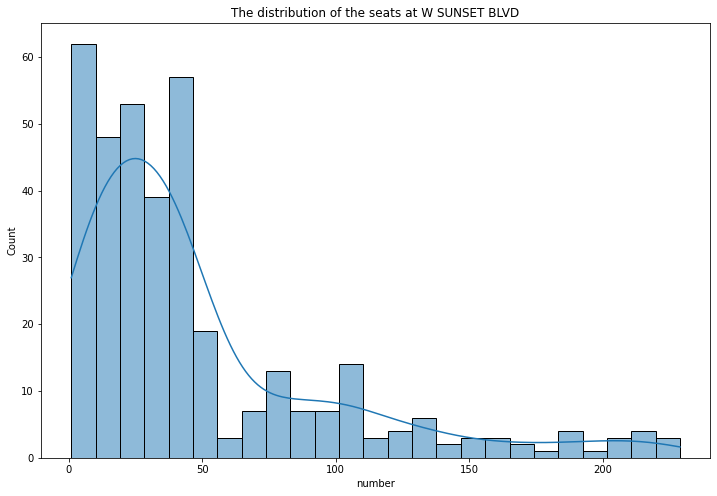

In [50]:
# Visualization of the distribution of the seats at W SUNSET BLVD

plt.figure(figsize=(12,8))
sns.histplot(data=top_seat_add['number'], kde=True)
plt.title('The distribution of the seats at W SUNSET BLVD');

**Findings:**
- W SUNSET BLVD is the most popular place with many restaurants, the number of seats in these restaurants varies with the most being dominated by 1-48 seats.
    
**Insights:**
- Each restaurant has a different number of seats, even for those with addresses at the most popular places.

**Recommendations:**
- Determine the type of business you want to run and the number of seats can be adjusted according to the shape of the business/restaurant location.

## Overall Conclusion

* **In the data pre-processing section:**
    1. From the data exploration, we find that the data type is appropriate already.
    2. There are missing values of 3 rows or 0.03%. We remove them since the amount is not significant to the whole data, but before that we save the original data to another new table.
    3. The *`chain`* column is converted to a boolean from an object type.
    4. There are no duplicate data. 
 

* **In the Exploratory Data Analysis (EDA) section:**

**Findings:**

1. 75% of business in LA is dominated by restaurants.
2. 61.9% business in LA is non-chain based.
3. The type of bakery business is 100% chain business in LA.
4. Cafes and fast food took the second and top three positions with 61.15% and 56.75% chain business in LA, respectively.
5. For chain business, the number of seats varies with most being dominated by 1-50 seats.
6. On average per type of business, restaurants are business that has the most number of seats of 48 seats.
7. Bakery is a type of business with small number of seats, on average of 21 seats.
8. W SUNSET BLVD and W PICO BLVD are the streets with the most restaurants, there are 296 and 288 restaurants respectively.
9. At W SUNSET BLVD street, the number of seats in these restaurants varies with the most being dominated by 1-48 seats.



**Insights:**
1. We might say that the need for people in LA to eat in restaurants is probably very high, then the number of restaurants there is high to meet the demand.
2. Thus, the competition between restaurants type of business is also high.
3. Businesses in LA are mostly non-chain businesses.
4. There is no specific characteristics of a chain-based business, especially from the number of seats.
5. Many people go to the restaurant to eat dine-in, while people who go to the bakery to take away, so restaurants need to have as many seats as possible, while bakeries don't.
6. W SUNSET BLVD and W PICO BLVD are the most popular places that have many restaurants, indicating a large number of customers who visit the places.
7. Based on the data we have, there are 2481 of streets that have only one restaurant.
8. Each restaurant has a different number of seats, even for those with addresses at the most popular places.



**Overall Recommendations:**

We can open a restaurant on the top ten address in LA because they are indicating a large number of customers who visit the places. We also recommend a few below:
- Choose type of business that not really high in competition such as fast food or bakery (the proportion of existing businesses is still small at 11% and 2.9%, respectively).
- The number of seats can be adjusted based on the location's shape of the business/restaurant.
- Bakery is the best choice if the company want to reduce initial capital costs, because average seats available are 21 seats.
- Opportunity in chain business is still high as only 38.1% are existing in LA (bakery is 100% chain-business), please consider spreading business using this method to increase revenue faster.

Presentation's link: <https://drive.google.com/file/d/1bBpEubQWLmM5NppZNYGSa3NjPXmdlj9Q/view?usp=sharing> 